In [1]:
# Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.dpi'] = 500
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler,LabelEncoder
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_excel('heart_disease.xlsx', sheet_name='Heart_disease')
df

age   sex               cp  trestbps  chol    fbs           restecg  \
0     63  Male   typical angina       145   233   True    lv hypertrophy   
1     41  Male  atypical angina       135   203  False            normal   
2     57  Male     asymptomatic       140   192  False            normal   
3     52  Male   typical angina       118   186  False    lv hypertrophy   
4     57  Male     asymptomatic       110   201  False            normal   
..   ...   ...              ...       ...   ...    ...               ...   
903   53  Male     asymptomatic       125     0  False            normal   
904   62  Male     asymptomatic       166   170  False  st-t abnormality   
905   56  Male      non-anginal       170     0  False    lv hypertrophy   
906   56  Male      non-anginal       144   208   True  st-t abnormality   
907   57  Male     asymptomatic       142   277   True  st-t abnormality   

     thalch  exang  oldpeak        slope               thal  num  
0       150  False      2.3  downsloping       fixed defect    0  
1       132  False      0.0         flat       fixed defect    0  
2       148  False      0.4         flat       fixed defect    0  
3       190  False      0.0         flat       fixed defect    0  
4       126   True      1.5         flat       fixed defect    0  
..      ...    ...      ...          ...                ...  ...  
903     120  False      1.5    upsloping  reversable defect    4  
904     120   True      3.0         flat  reversable defect    4  
905     123   True      2.5  downsloping             normal    4  
906     105   TURE      NaN  downsloping       fixed defect    4  
907     182  FALSE      NaN         flat  reversable defect    4  

[908 rows x 13 columns]

# Data Analysis & Data Pre-Processing

In [3]:
df.describe()

age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811
std      9.158031   20.401608  112.097949   26.804929    1.093875    1.144436
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.500000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [5]:
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [6]:
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [7]:
df.shape

(908, 13)

In [8]:
# Handling Missing Values in 'oldpeak' column

df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].mean())

In [9]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

# Feature Engineering

In [11]:
# Encoding The Columns for ease

le = LabelEncoder()

# Convert 'exang' column to string type before encoding
df['exang'] = df['exang'].astype(str)

df['exang'] = le.fit_transform(df['exang'])
df['sex'] = le.fit_transform(df['sex'])
df['fbs'] = le.fit_transform(df['fbs'])
df['restecg'] = le.fit_transform(df['restecg'])
df['cp'] = le.fit_transform(df['cp'])
df['thal'] = le.fit_transform(df['thal'])
df['slope'] = le.fit_transform(df['slope'])

In [12]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalch  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0     150      1      2.3      0   
1   41    1   1       135   203    0        1     132      1      0.0      1   
2   57    1   0       140   192    0        1     148      1      0.4      1   
3   52    1   3       118   186    0        0     190      1      0.0      1   
4   57    1   0       110   201    0        1     126      3      1.5      1   

   thal  num  
0     0    0  
1     0    0  
2     0    0  
3     0    0  
4     0    0

# Data Visualization

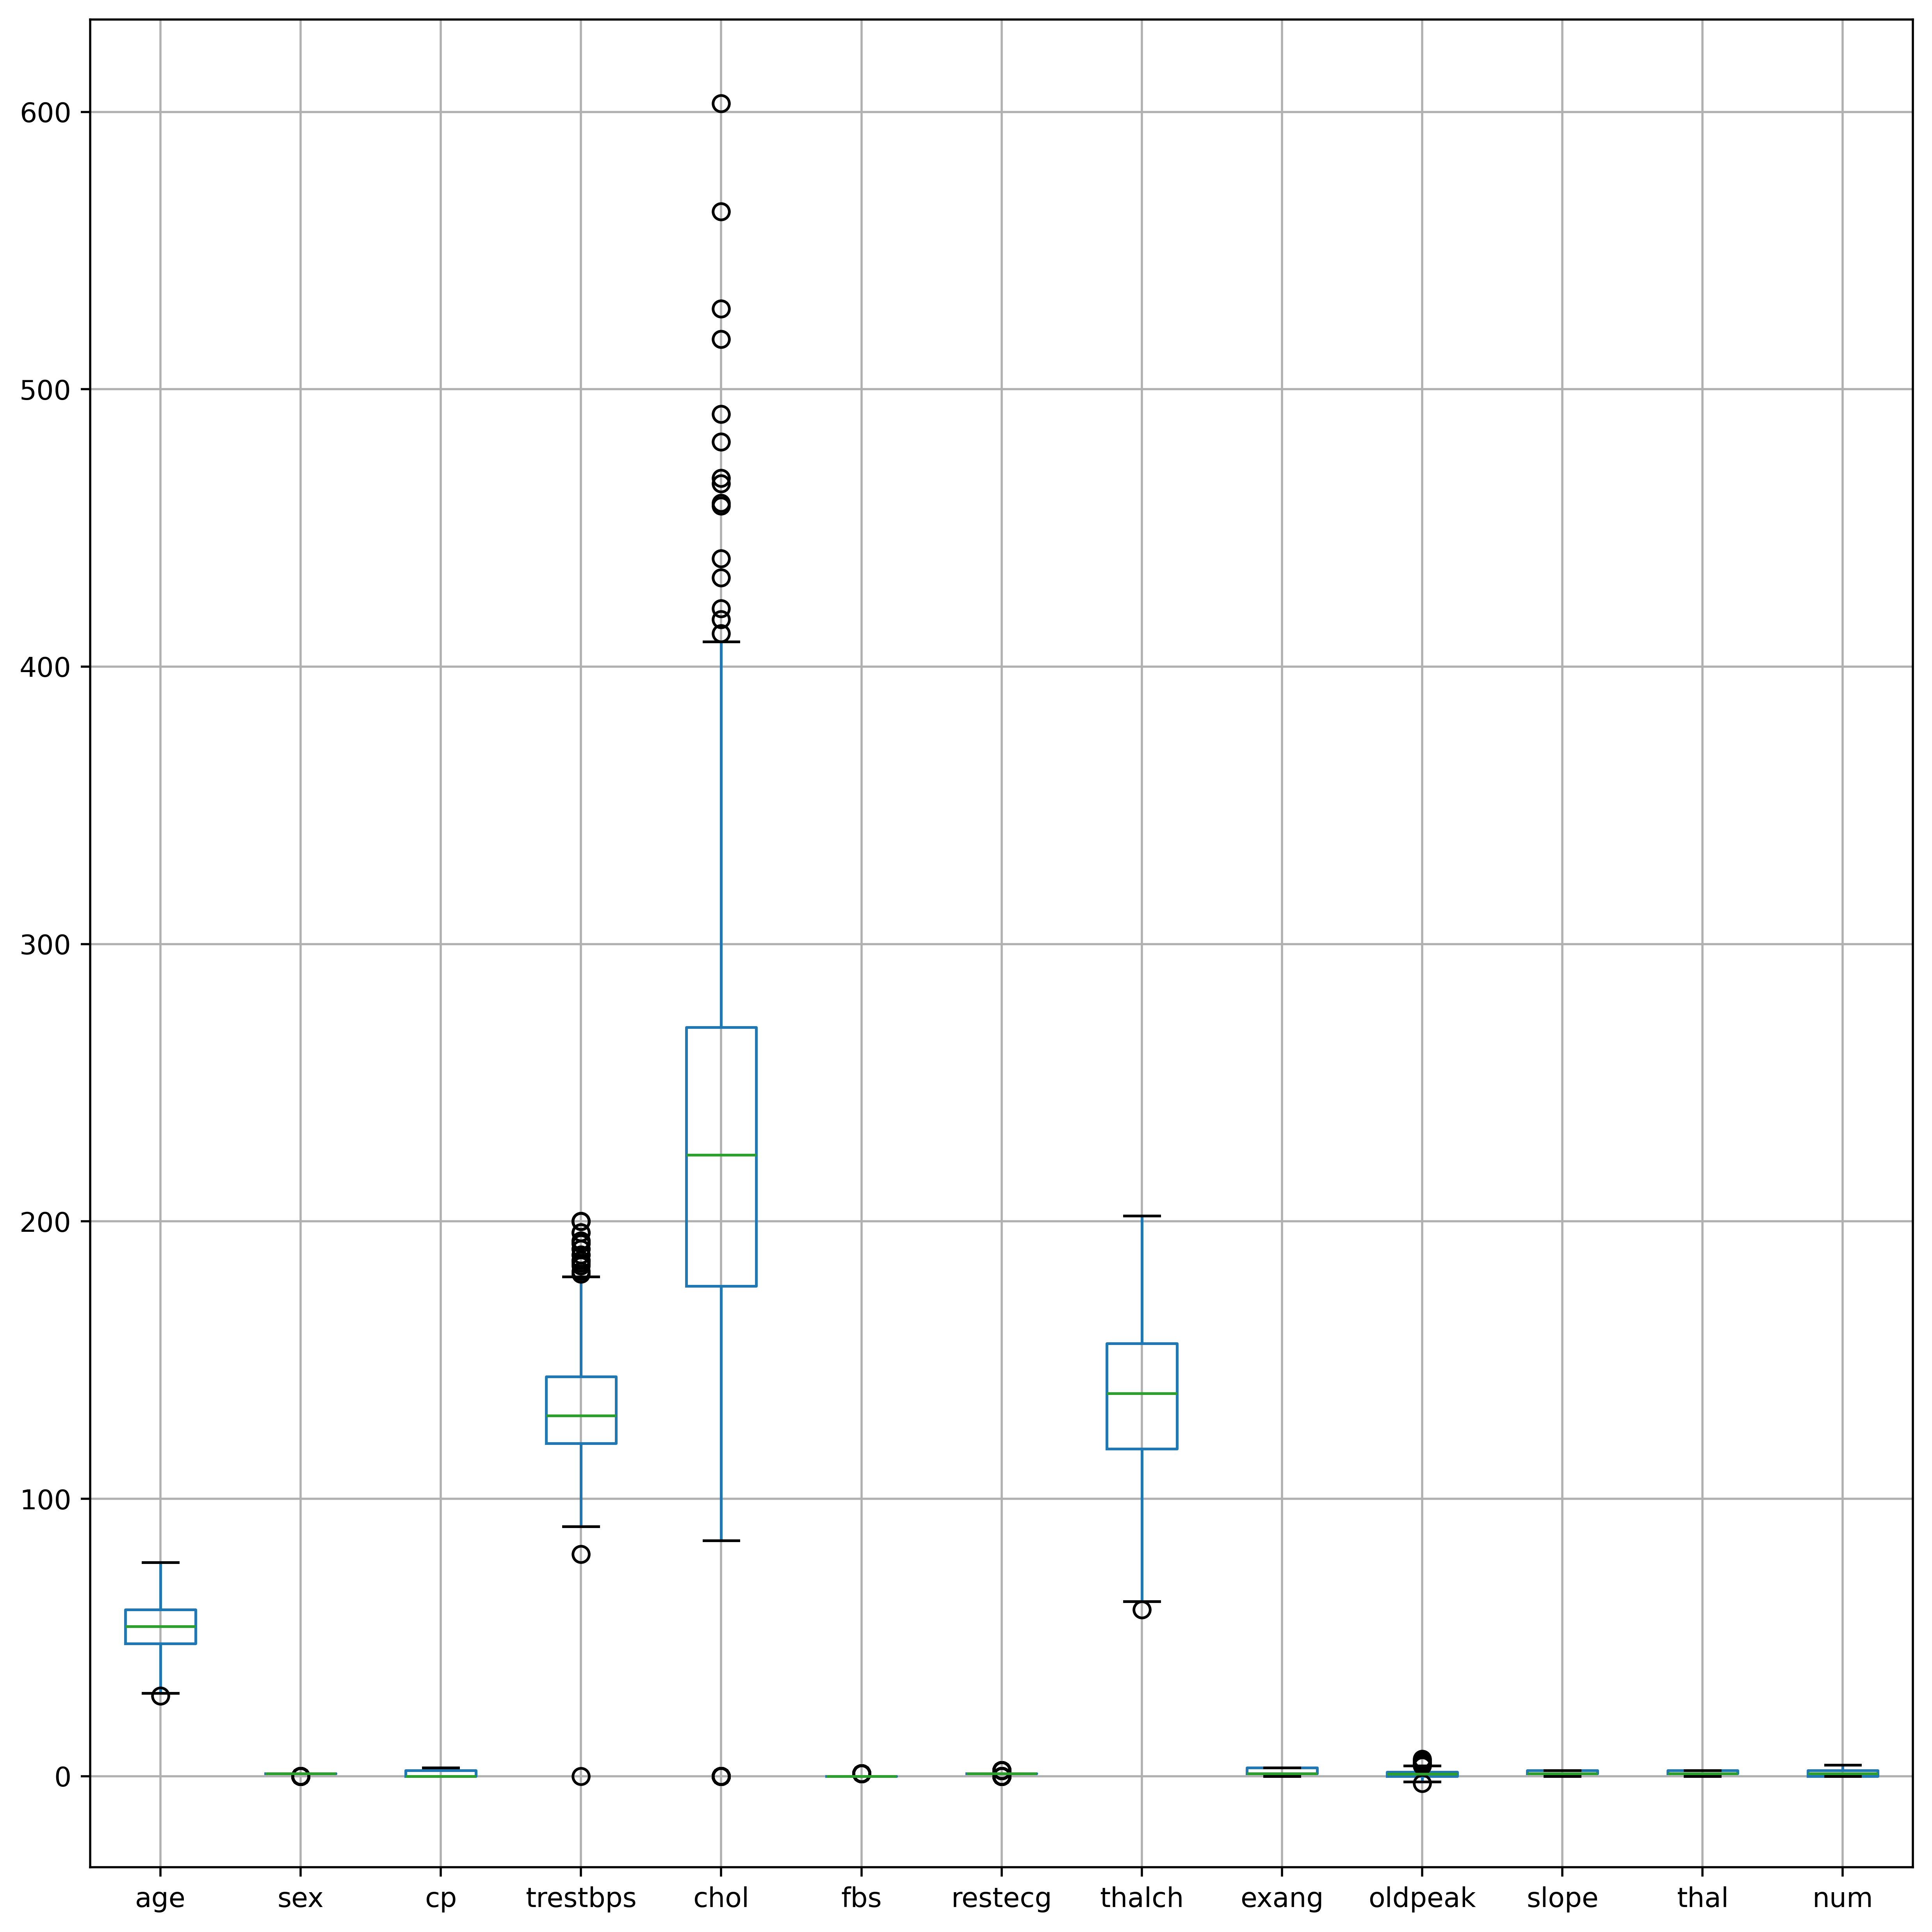

In [13]:
df.boxplot()
plt.tight_layout()

- Most of the columns have outliers on both sides (upper & lower).

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalch'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'thal'}>],
       [<Axes: title={'center': 'num'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

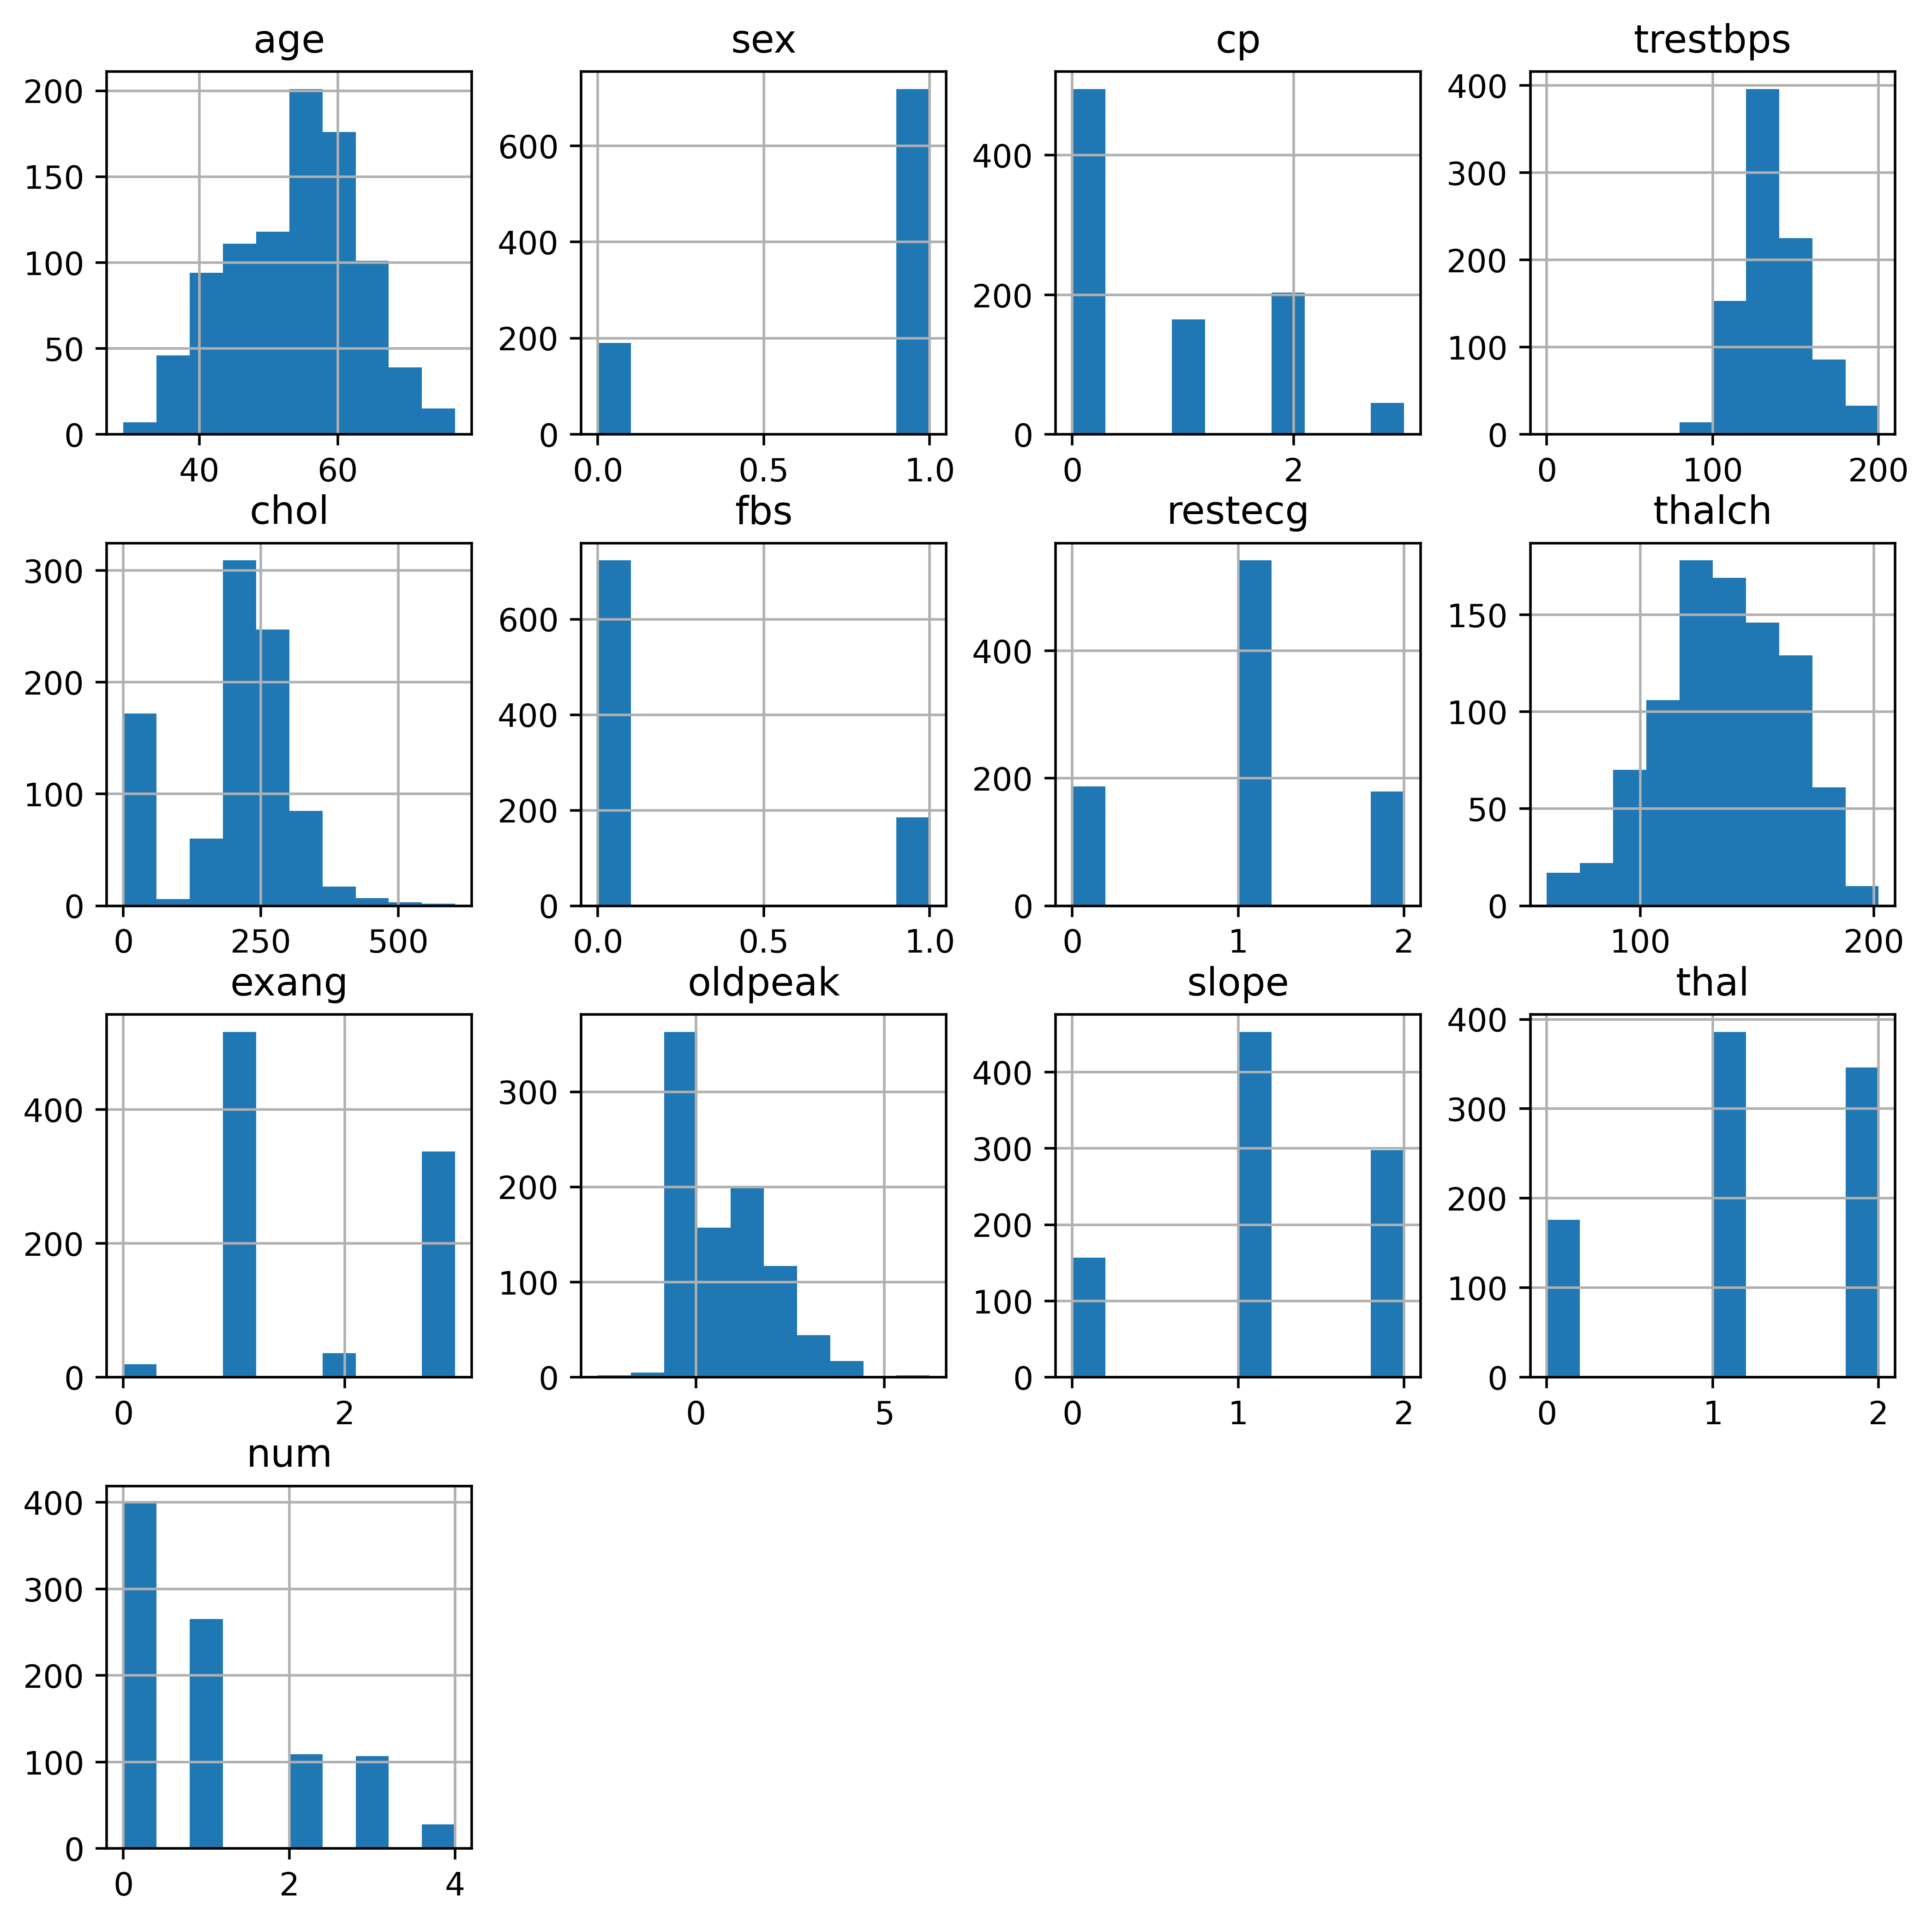

In [14]:
df.hist()

<Axes: >

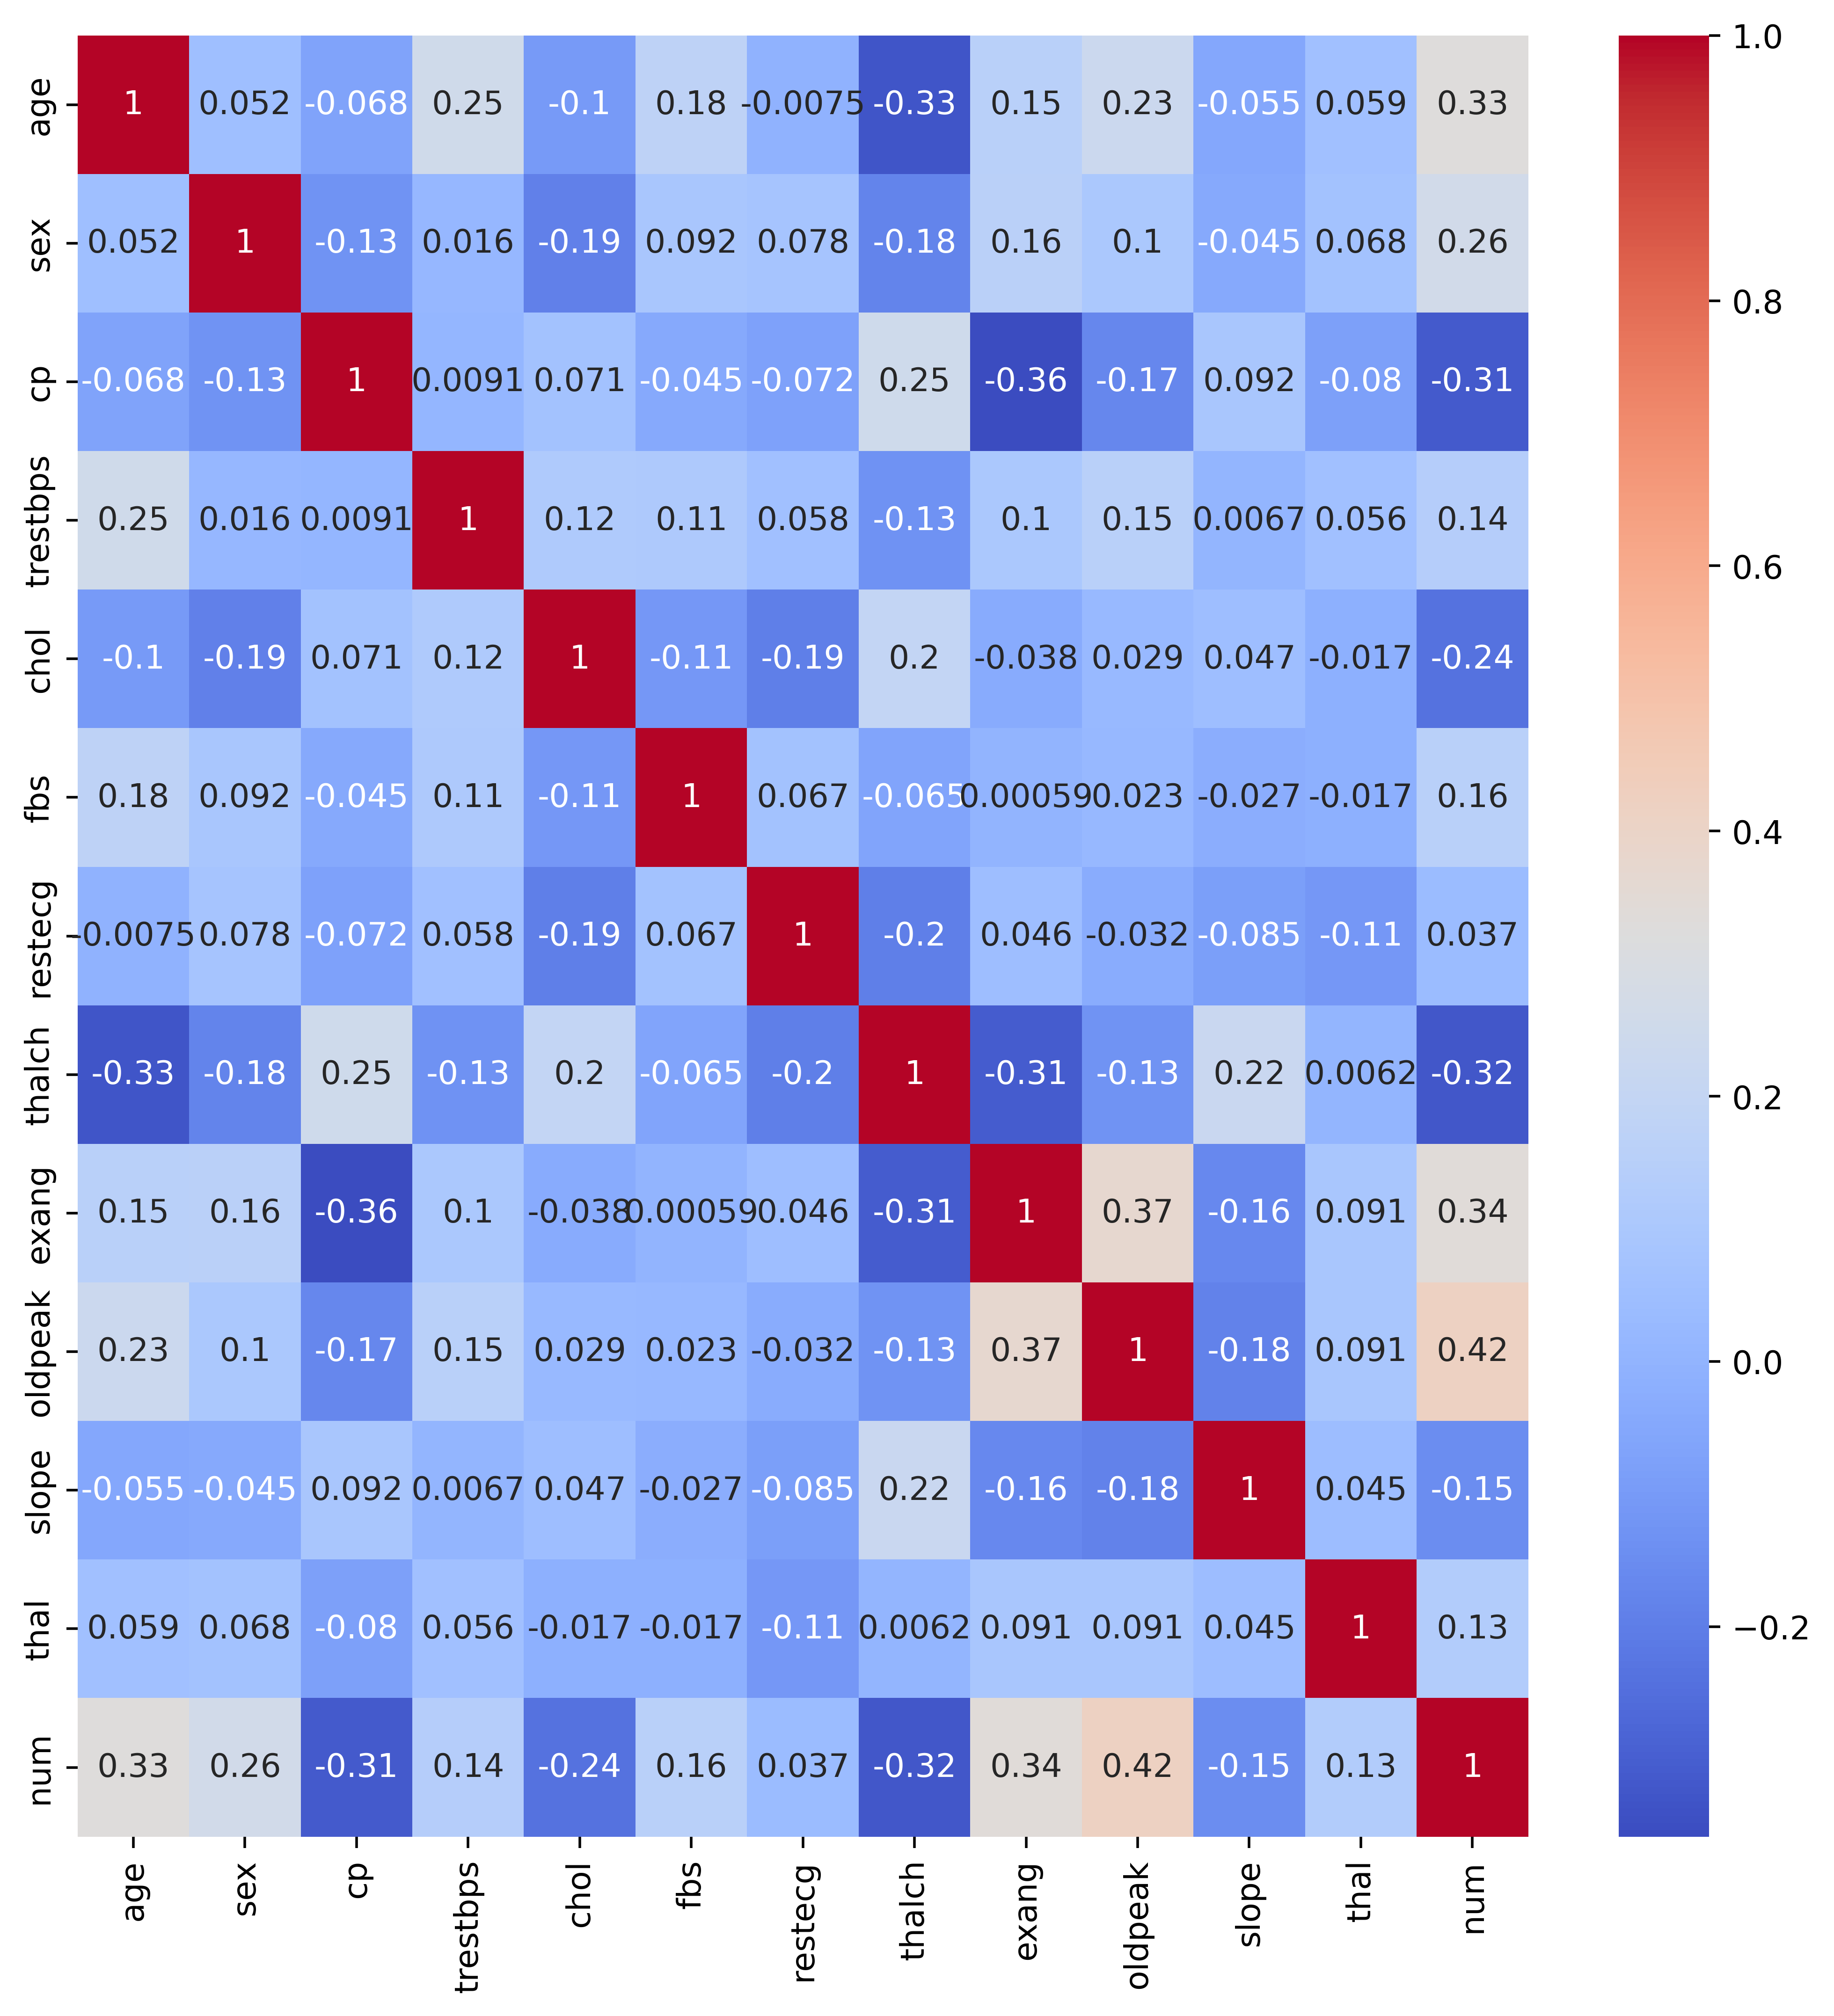

In [15]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='trestbps', ylabel='chol'>

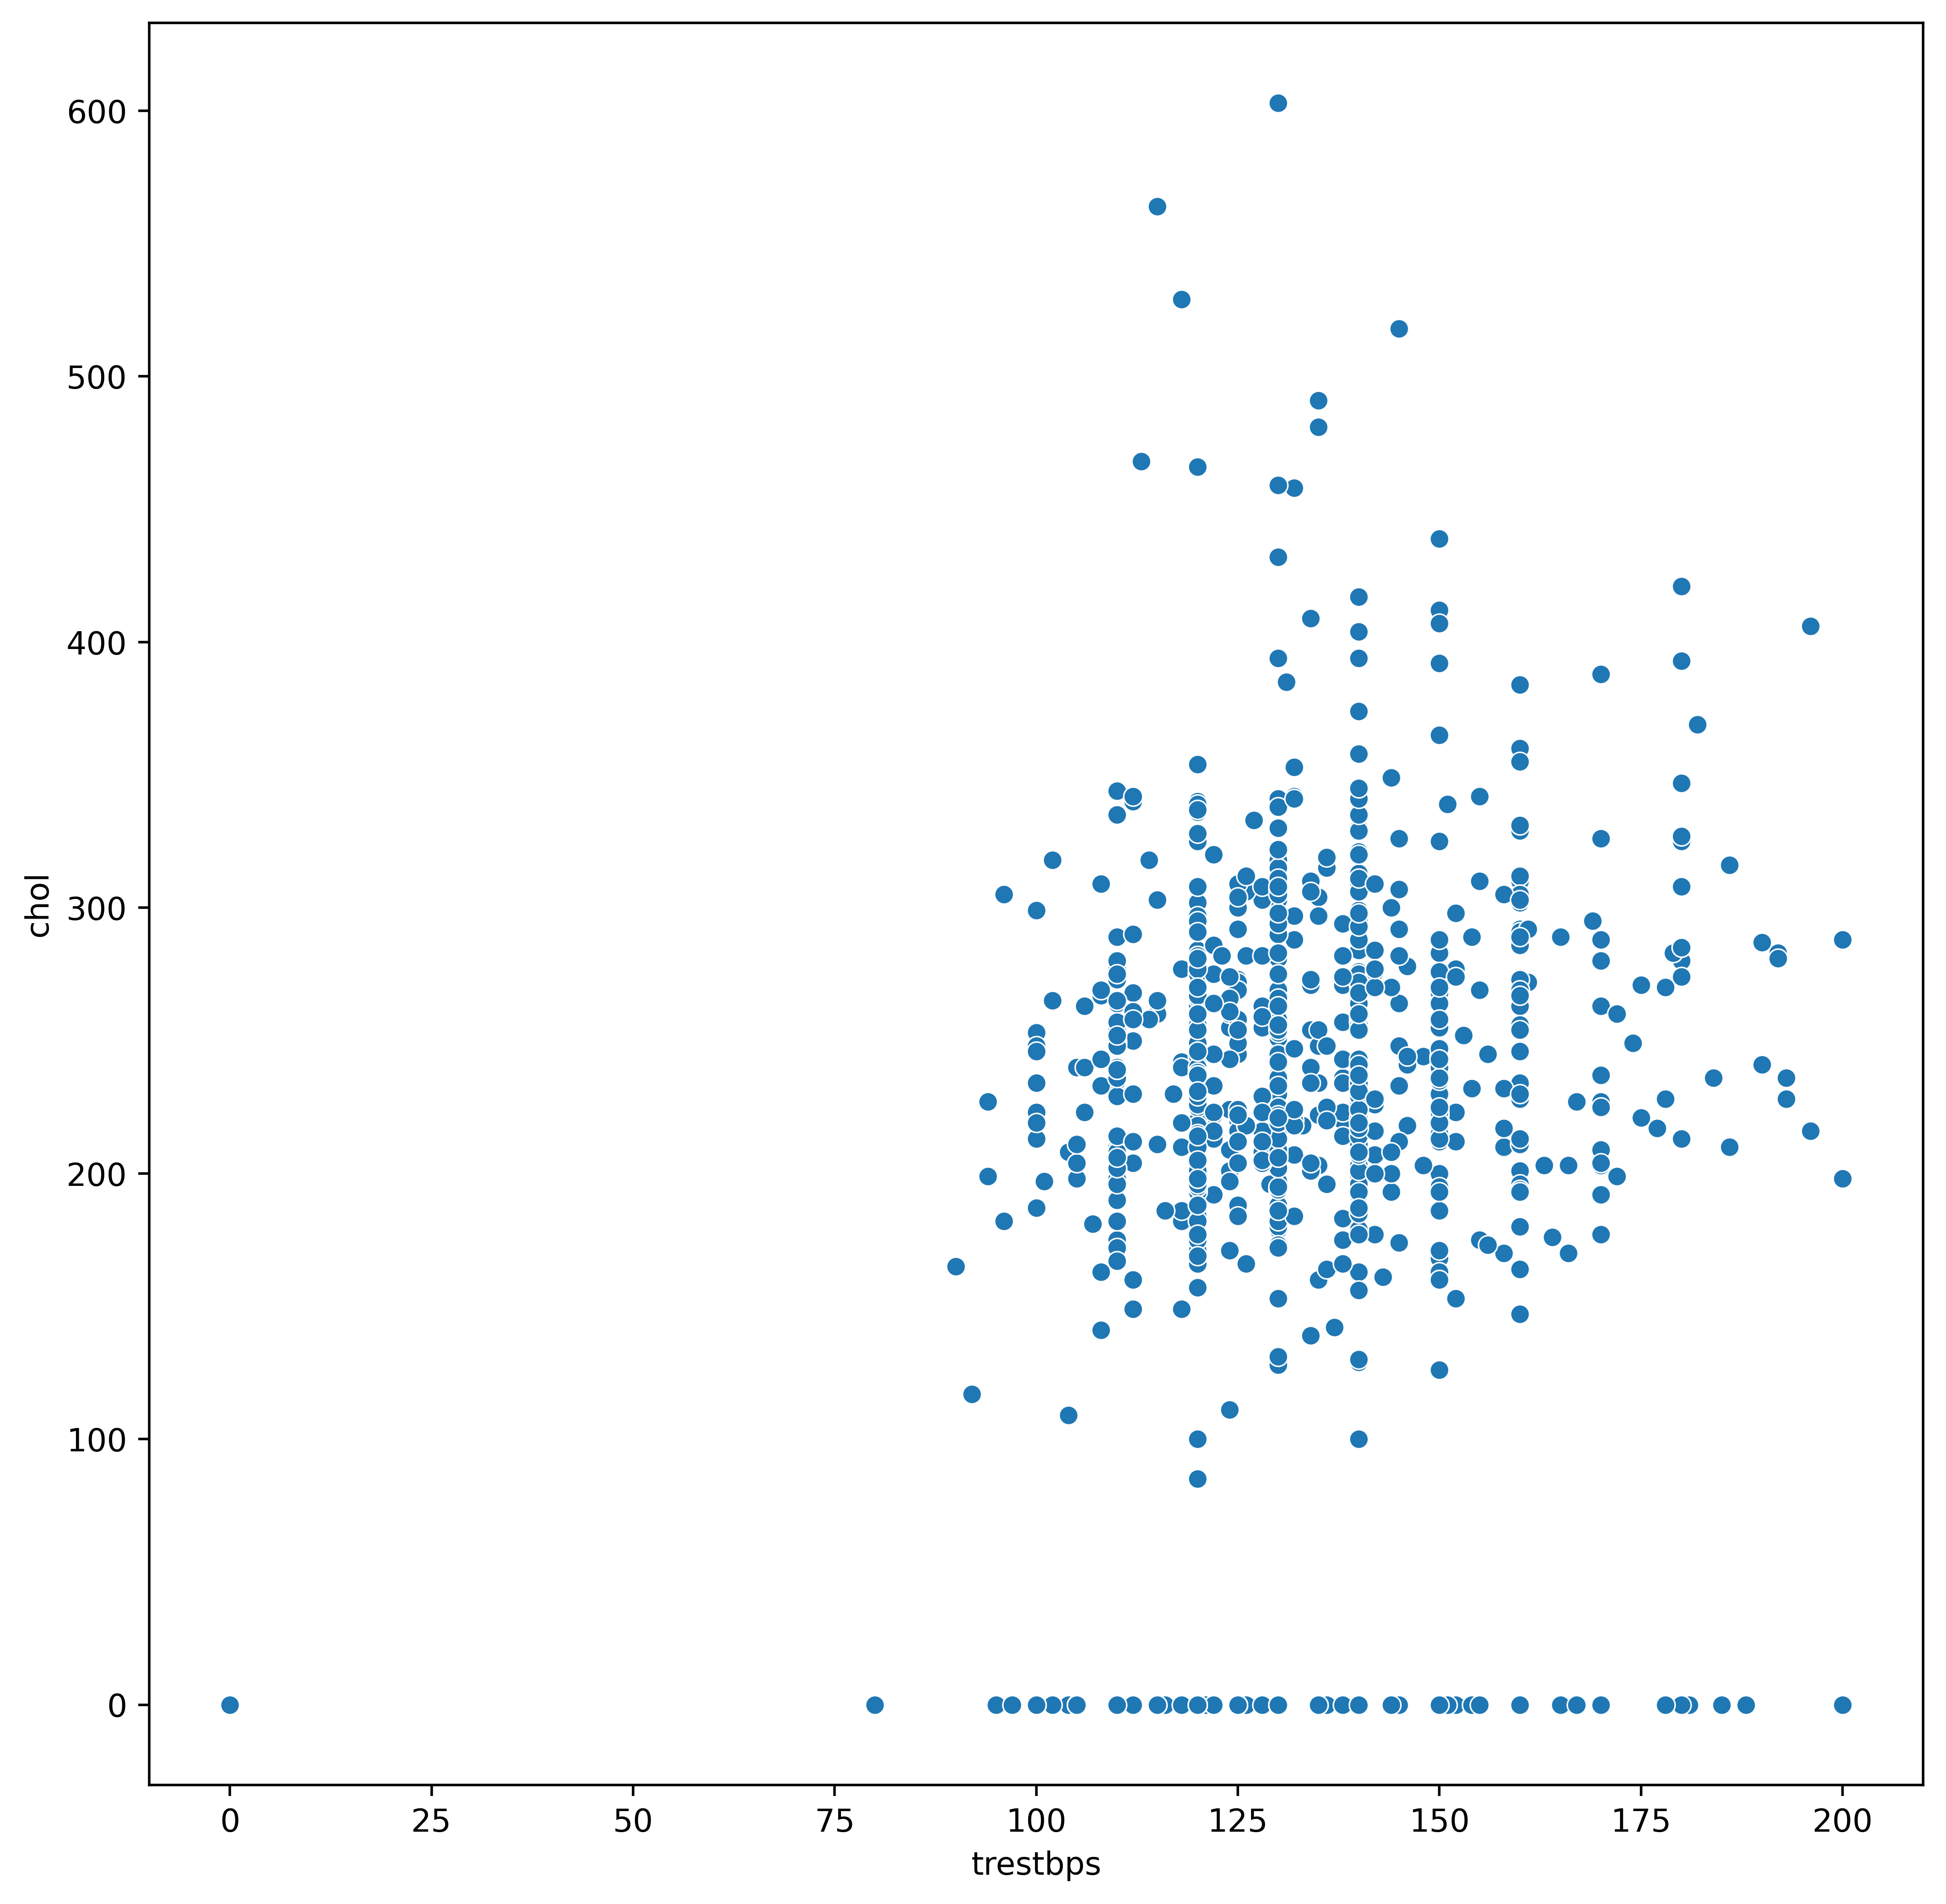

In [16]:
sns.scatterplot(x='trestbps', y = 'chol', cmap='coolwarm', data=df)

In [17]:
# Renaming the target column ('num')

df.rename(columns={'num':'target'}, inplace=True)

In [18]:
# Seperating x & y

x = df.drop('target', axis=1)
y = df['target']

In [19]:
x

age  sex  cp  trestbps  chol  fbs  restecg  thalch  exang   oldpeak  \
0     63    1   3       145   233    1        0     150      1  2.300000   
1     41    1   1       135   203    0        1     132      1  0.000000   
2     57    1   0       140   192    0        1     148      1  0.400000   
3     52    1   3       118   186    0        0     190      1  0.000000   
4     57    1   0       110   201    0        1     126      3  1.500000   
..   ...  ...  ..       ...   ...  ...      ...     ...    ...       ...   
903   53    1   0       125     0    0        1     120      1  1.500000   
904   62    1   0       166   170    0        2     120      3  3.000000   
905   56    1   2       170     0    0        0     123      3  2.500000   
906   56    1   2       144   208    1        2     105      2  0.891253   
907   57    1   0       142   277    1        2     182      0  0.891253   

     slope  thal  
0        0     0  
1        1     0  
2        1     0  
3        1     0  
4        1     0  
..     ...   ...  
903      2     2  
904      1     2  
905      0     1  
906      0     0  
907      1     2  

[908 rows x 12 columns]

In [20]:
y

0      0
1      0
2      0
3      0
4      0
      ..
903    4
904    4
905    4
906    4
907    4
Name: target, Length: 908, dtype: int64

# Decision Tree Classification

In [21]:
# Splitting the data into training & testing sets

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
# Applying the Decision Tree Model

dt_model = DecisionTreeClassifier()

dt_model.fit(xtrain, ytrain)

ypred = dt_model.predict(xtest)

In [23]:
ypred

array([2, 1, 0, 2, 1, 1, 1, 0, 1, 1, 3, 1, 0, 0, 0, 2, 0, 0, 0, 3, 0, 1,
       1, 3, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 4, 1, 1, 0,
       2, 2, 0, 0, 0, 1, 2, 3, 0, 3, 0, 0, 3, 1, 1, 2, 0, 0, 3, 0, 0, 1,
       1, 1, 1, 1, 0, 3, 3, 3, 0, 0, 1, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       3, 2, 3, 3, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 3, 0, 2, 3, 1, 1, 2,
       0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       2, 1, 1, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 2,
       2, 1, 1, 0, 1, 0, 1, 3, 0, 0, 0, 1, 3, 1, 2, 0, 0, 0, 0, 0, 0, 4,
       2, 1, 4, 2, 0, 0])

In [24]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.73      0.74      0.74        89
           1       0.35      0.35      0.35        48
           2       0.41      0.41      0.41        22
           3       0.17      0.18      0.17        17
           4       0.00      0.00      0.00         6

    accuracy                           0.52       182
   macro avg       0.33      0.34      0.33       182
weighted avg       0.52      0.52      0.52       182



In [25]:
confusion_matrix(ytest, ypred)

array([[66, 14,  4,  4,  1],
       [18, 17,  7,  6,  0],
       [ 3,  4,  9,  5,  1],
       [ 3,  9,  1,  3,  1],
       [ 0,  5,  1,  0,  0]])

In [26]:
dt_model.score(xtest, ytest)

0.521978021978022

In [27]:
# Analyzing The Decision Tree

plt.figure(figsize=(20,20))
tree.plot_tree(dt_model, filled=True)

[Text(0.5885870641838352, 0.9705882352941176, 'x[2] <= 0.5\ngini = 0.698\nsamples = 726\nvalue = [310.0, 217.0, 87.0, 90.0, 22.0]'),
 Text(0.37012183042789226, 0.9117647058823529, 'x[0] <= 59.5\ngini = 0.734\nsamples = 408\nvalue = [86, 163, 71, 70, 18]'),
 Text(0.47935444730586374, 0.9411764705882353, 'True  '),
 Text(0.21635631273111464, 0.8529411764705882, 'x[8] <= 2.5\ngini = 0.685\nsamples = 269\nvalue = [69, 125, 37, 31, 7]'),
 Text(0.10320919175911251, 0.7941176470588235, 'x[4] <= 42.5\ngini = 0.69\nsamples = 128\nvalue = [52, 44, 19, 7, 6]'),
 Text(0.02746962493396725, 0.7352941176470589, 'x[7] <= 105.0\ngini = 0.659\nsamples = 36\nvalue = [1, 15, 14, 4, 2]'),
 Text(0.016904384574749076, 0.6764705882352942, 'x[7] <= 93.0\ngini = 0.694\nsamples = 7\nvalue = [0, 1, 1, 3, 2]'),
 Text(0.012678288431061807, 0.6176470588235294, 'x[7] <= 87.0\ngini = 0.72\nsamples = 5\nvalue = [0, 1, 1, 1, 2]'),
 Text(0.008452192287374538, 0.5588235294117647, 'x[10] <= 1.5\ngini = 0.667\nsamples = 3\n

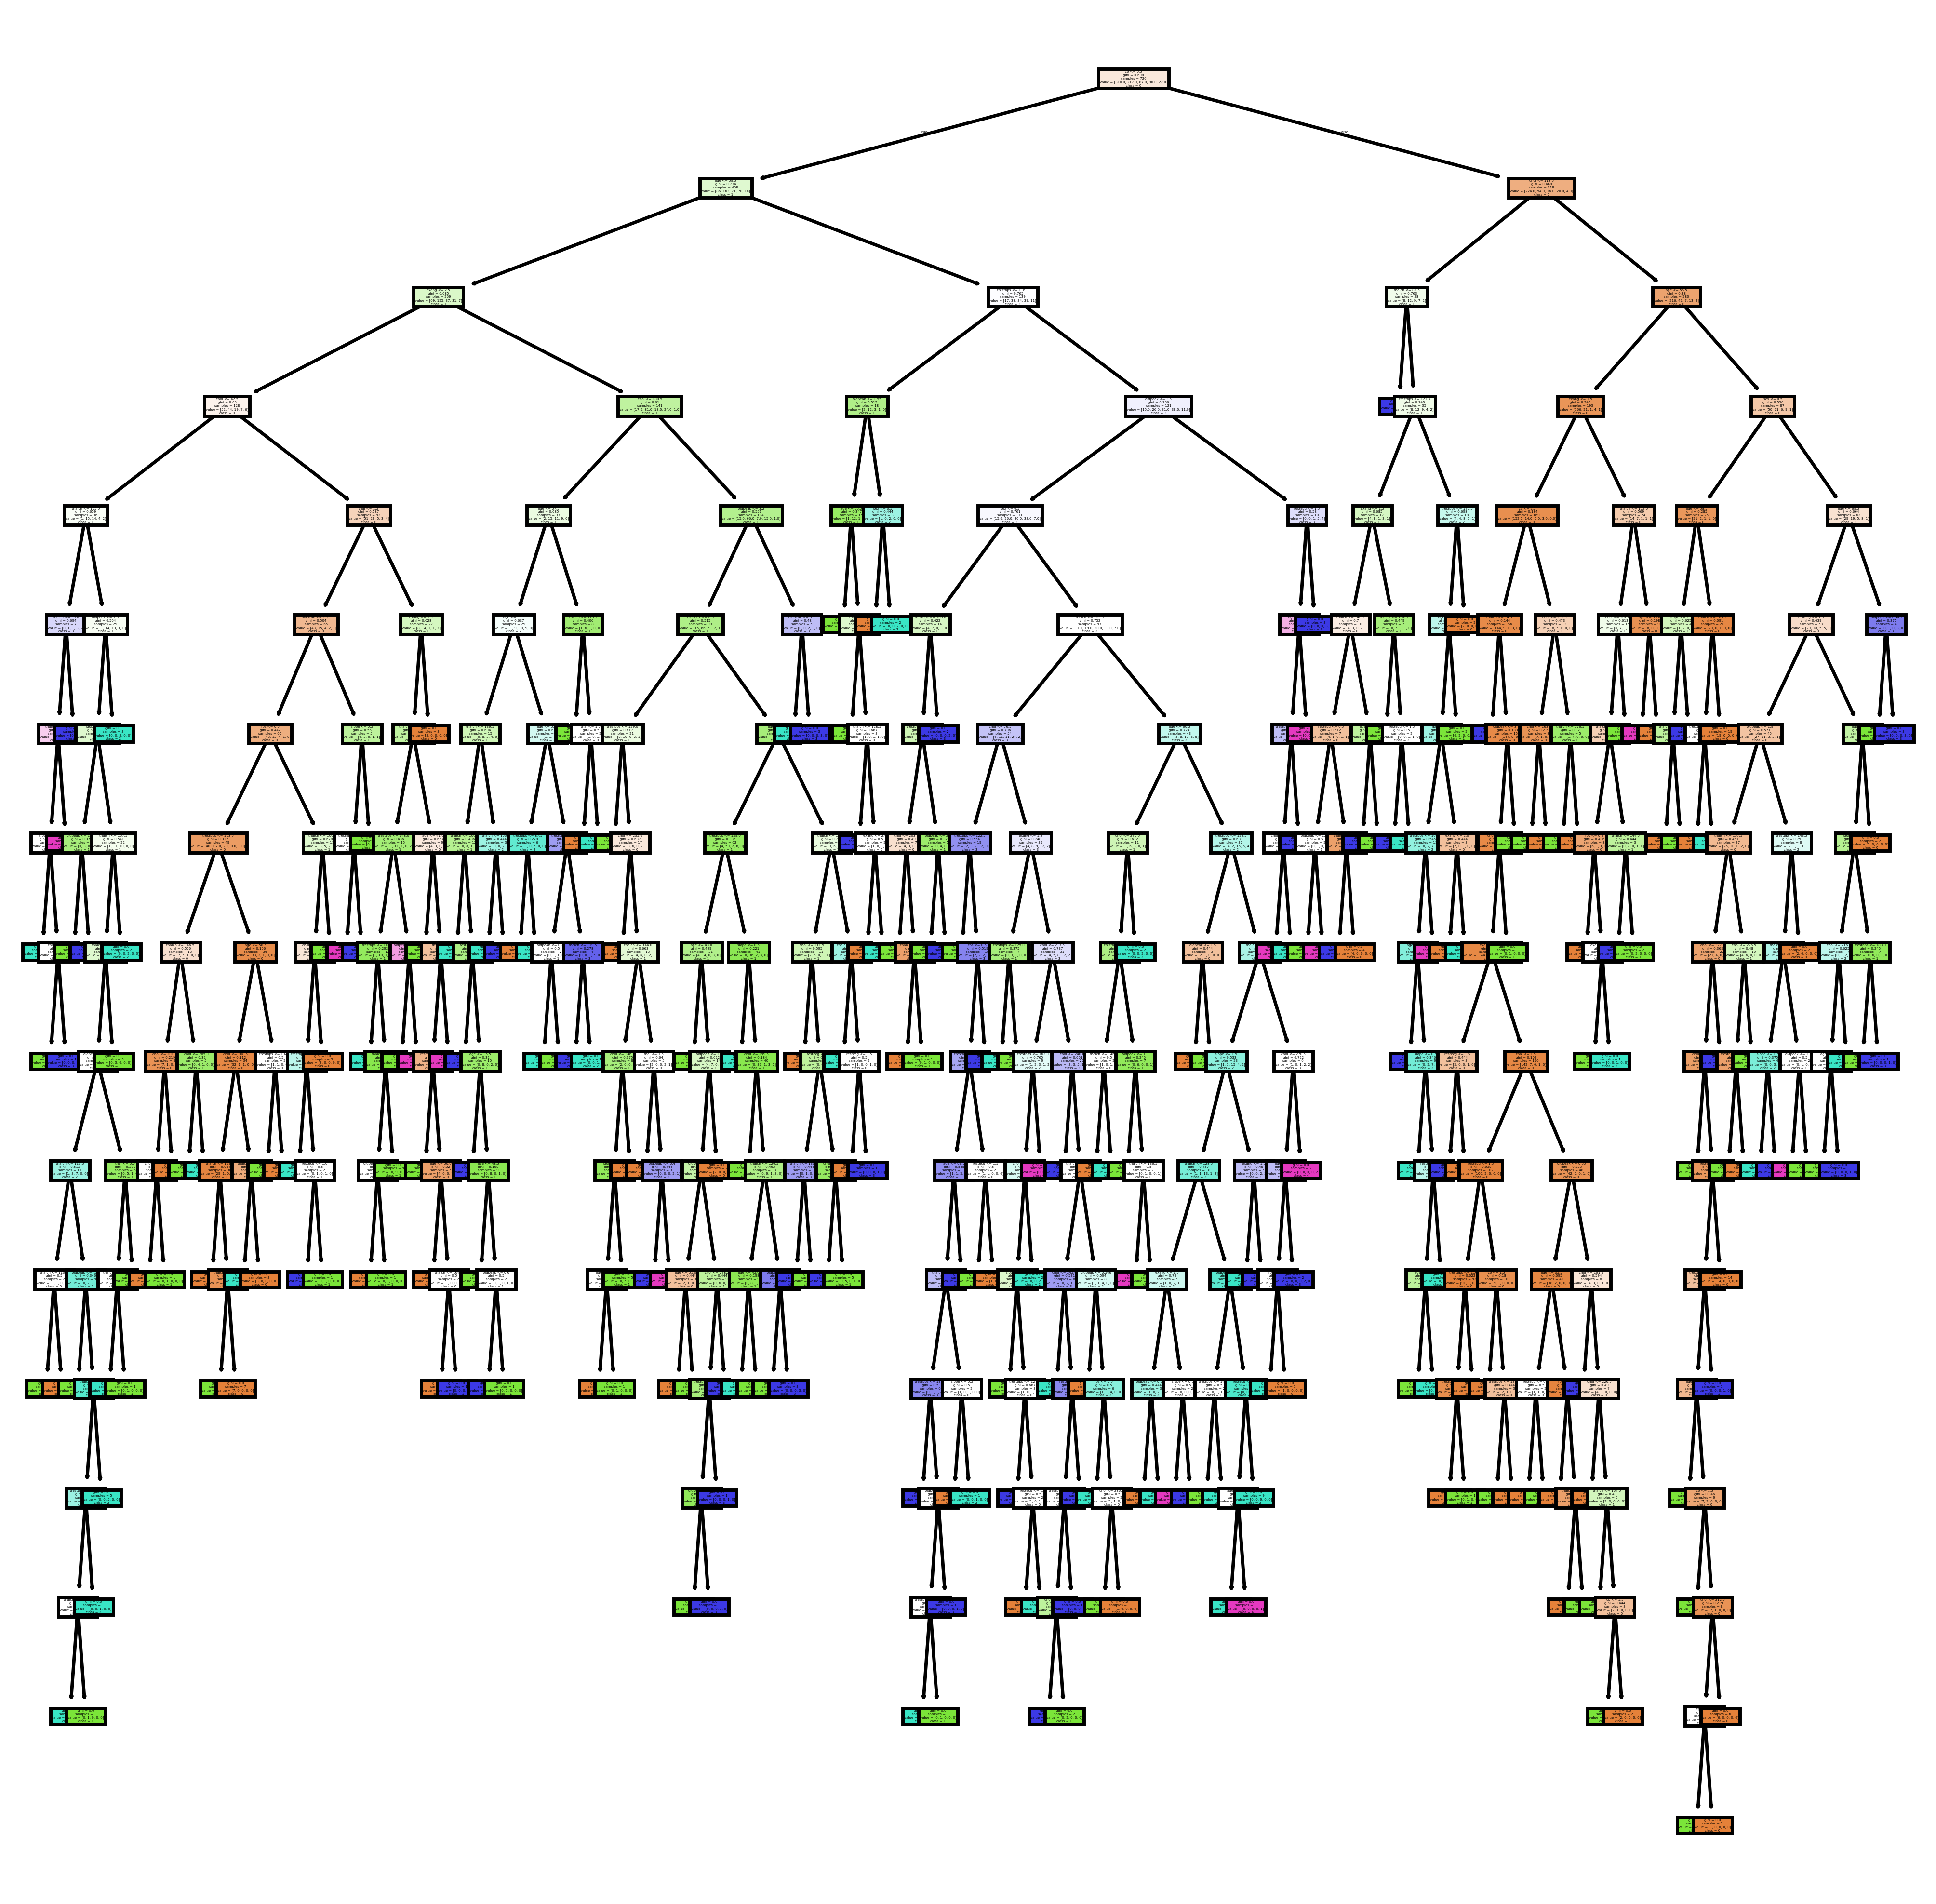

array([0.12729468, 0.01526155, 0.12749903, 0.11537439, 0.15906805,
       0.02580314, 0.04270215, 0.17191471, 0.0527049 , 0.10780536,
       0.03274723, 0.02182481])

In [30]:
# Second Try For Decision Tree

# Converting class names to strings explicitly
class_names_str = [str(name) for name in df['target'].unique()]

tree.plot_tree(dt_model, feature_names=x.columns, class_names=class_names_str, filled=True)
plt.show()

dt_model.feature_importances_

# Hyperparameter Tuning

In [60]:
# Create the parameter grid
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, None],  # Include None for no depth limit
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': [None, 'sqrt', 'log2'],  # Add max_features
    'criterion': ['gini', 'entropy', 'log_loss'] # Include log_loss
}

In [61]:
# Initialize GridSearchCV with improved scoring
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid,
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

In [62]:
# Fit the grid search to the training data
grid_search.fit(xtrain, ytrain)

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, None],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 6, 8],
                         'min_samples_split': [2, 5, 10, 15, 20]},
             scoring='accuracy', verbose=1)

In [63]:
# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'criterion': 'log_loss', 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 20}
Best cross-validation score: 0.5826735947094945


In [64]:
# Evaluate the best model on the test set
best_dt_model = grid_search.best_estimator_
ypred_best = best_dt_model.predict(xtest)

In [65]:
# Print classification report and confusion matrix for the best model
print(classification_report(ytest, ypred_best))
print(confusion_matrix(ytest, ypred_best))
print("Test Accuracy:",best_dt_model.score(xtest,ytest))

              precision    recall  f1-score   support

           0       0.76      0.83      0.80        89
           1       0.45      0.52      0.49        48
           2       0.33      0.27      0.30        22
           3       0.17      0.12      0.14        17
           4       0.00      0.00      0.00         6

    accuracy                           0.59       182
   macro avg       0.34      0.35      0.34       182
weighted avg       0.55      0.59      0.57       182

[[74  9  5  1  0]
 [16 25  2  5  0]
 [ 2 11  6  3  0]
 [ 4  8  3  2  0]
 [ 1  2  2  1  0]]
Test Accuracy: 0.5879120879120879


In [66]:
# Visualizing the Decision Tree After Hyperparameter Tuning

plt.figure(figsize=(20,20))
tree.plot_tree(best_dt_model, filled=True)

[Text(0.5, 0.9, 'x[2] <= 0.5\nlog_loss = 1.938\nsamples = 726\nvalue = [310.0, 217.0, 87.0, 90.0, 22.0]'),
 Text(0.25, 0.7, 'x[0] <= 59.5\nlog_loss = 2.076\nsamples = 408\nvalue = [86, 163, 71, 70, 18]'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[4] <= 42.5\nlog_loss = 1.907\nsamples = 269\nvalue = [69, 125, 37, 31, 7]'),
 Text(0.0625, 0.3, 'x[6] <= 1.5\nlog_loss = 1.84\nsamples = 64\nvalue = [3, 26, 23, 10, 2]'),
 Text(0.03125, 0.1, 'log_loss = 1.716\nsamples = 48\nvalue = [1, 21, 17, 8, 1]'),
 Text(0.09375, 0.1, 'log_loss = 2.055\nsamples = 16\nvalue = [2, 5, 6, 2, 1]'),
 Text(0.1875, 0.3, 'x[10] <= 1.5\nlog_loss = 1.765\nsamples = 205\nvalue = [66.0, 99.0, 14.0, 21.0, 5.0]'),
 Text(0.15625, 0.1, 'log_loss = 1.758\nsamples = 155\nvalue = [41, 82, 10, 17, 5]'),
 Text(0.21875, 0.1, 'log_loss = 1.612\nsamples = 50\nvalue = [25, 17, 4, 4, 0]'),
 Text(0.375, 0.5, 'x[9] <= 1.9\nlog_loss = 2.183\nsamples = 139\nvalue = [17, 38, 34, 39, 11]'),
 Text(0.3125, 0.3, 'x[3] <= 124.5\nlog_l

# Interview Questions

**What are some common hyperparameters of decision tree models, and how do they affect the model's performance ?**


1. max_depth

  - Limits the maximum depth of the tree.
  - A smaller value reduces overfitting but may underfit the data.

2. min_samples_split

  - Minimum number of samples required to split an internal node.
  - Higher values prevent splitting on small subsets, reducing overfitting.

3. min_samples_leaf

  - Minimum number of samples required to be in a leaf node.
  - Larger values create smoother predictions and reduce variance.

4. max_features

  - Number of features to consider for a split.
  - Reducing this value introduces randomness and helps combat overfitting.

5. max_leaf_nodes

  - Maximum number of leaf nodes in the tree.
  - Limits complexity and reduces overfitting.

6. criterion (e.g., gini or entropy)

  - Determines the metric used for splitting nodes.
  - Affects how the tree selects splits (e.g., impurity vs. information gain).

7. splitter (e.g., best or random)

  - Chooses the strategy for selecting the split at each node.
  - Random splitting can improve generalization but may reduce accuracy.

8. min_impurity_decrease

  - Minimum decrease in impurity required to split a node.
  - Helps prune unnecessary splits and controls overfitting.

- Tuning these hyperparameters affects the model’s trade-off between bias (underfitting) and variance (overfitting).



**What is the difference between the Label encoding and One-hot encoding ?**

1. Label Encoding

- Definition: Assigns a unique integer to each category within a feature.

**Key Points:**

- Simplicity: Easy to implement and computationally efficient.
- Ordinality: Implies an order between categories, which may not be - accurate (e.g., "red"=1, "green"=2, "blue"=3 does not mean green is "greater" than red).
- Suitable for: Ordinal data (where order matters) and tree-based models.

2. One-Hot Encoding

- Definition: Creates a new binary column for each category. A "1" is placed in the column corresponding to the category, and "0" in the others.

**Key Points:**

- No Ordinality: Avoids the issue of implied order between categories.
- Suitable for: Nominal data (no inherent order) and most machine learning algorithms.
- Dimensionality: Increases the number of features, which can impact model complexity and performance.

3. Conclusion:

- In conclusion, both Label Encoding and One-Hot Encoding are vital techniques for transforming categorical data into a numerical format suitable for machine learning algorithms. Label Encoding simplifies data by assigning unique integers to categories, but it can introduce a false sense of order. One-Hot Encoding, on the other hand, creates binary columns for each category, ensuring no implied order and making it suitable for a wider range of models. The choice between these techniques depends on the nature of the categorical data, its inherent order, and the specific requirements of the machine learning algorithm being used.
